#STOCK TIME SERIES ANALYSIS

Using LSTM to create a time series for the analysis of Stock over a time period and predicting the price of stocks of IBM for the year 2017

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
import seaborn as sns

In [ ]:
# Loading train dataset
dataset = pd.read_csv('/all_stocks_2006-01-01_to_2018-01-01.csv', index_col = "Name", parse_dates = ["Date"])
dataset.head()

,Date,Open,High,Low,Close,Volume
Name,,,,,,
MMM,2006-01-03,77.76,79.35,77.24,79.11,3117200
MMM,2006-01-04,79.49,79.49,78.25,78.71,2558000
MMM,2006-01-05,78.41,78.65,77.56,77.99,2529500
MMM,2006-01-06,78.64,78.90,77.64,78.63,2479500
MMM,2006-01-09,78.50,79.83,78.46,79.02,1845600


In [ ]:
data = dataset.loc["IBM"]

In [ ]:
data = data.reset_index().set_index('Date')

In [ ]:
data.head()

,Name,Open,High,Low,Close,Volume
Date,,,,,,
2006-01-03,IBM,82.45,82.55,80.81,82.06,11715200
2006-01-04,IBM,82.20,82.50,81.33,81.95,9840600
2006-01-05,IBM,81.40,82.90,81.00,82.50,7213500
2006-01-06,IBM,83.95,85.03,83.41,84.95,8197400
2006-01-09,IBM,84.10,84.25,83.38,83.73,6858200


In [ ]:
data.tail()

,Name,Open,High,Low,Close,Volume
Date,,,,,,
2017-12-22,IBM,151.82,153.00,151.50,152.50,2990583
2017-12-26,IBM,152.51,153.86,152.50,152.83,2479017
2017-12-27,IBM,152.95,153.18,152.61,153.13,2149257
2017-12-28,IBM,153.20,154.12,153.20,154.04,2687624
2017-12-29,IBM,154.17,154.72,153.42,153.42,3327087


In [ ]:
data.shape

(3020, 6)

Text(0.5, 1.0, 'Count plot for Open')

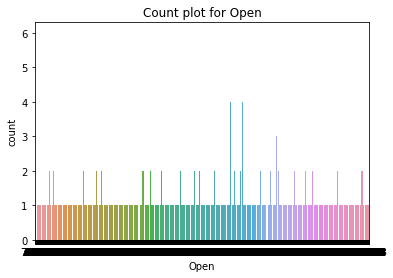

In [ ]:
# countplot for visualizing all the features of the dataset

sns.countplot(x ='Open', data = data).set_title('Count plot for Open')

Text(0.5, 1.0, 'Count plot for High')

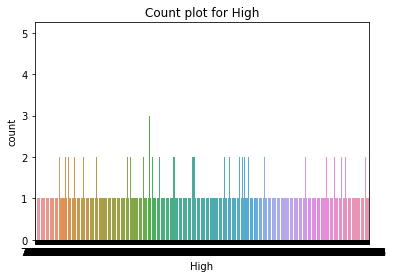

In [ ]:
sns.countplot(x ='High', data = data).set_title('Count plot for High')

Text(0.5, 1.0, 'Count plot for Low')

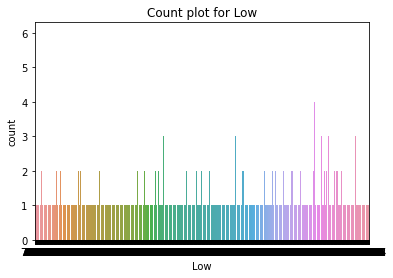

In [ ]:
sns.countplot(x ='Low', data = data).set_title('Count plot for Low')

Text(0.5, 1.0, 'Count plot for Close')

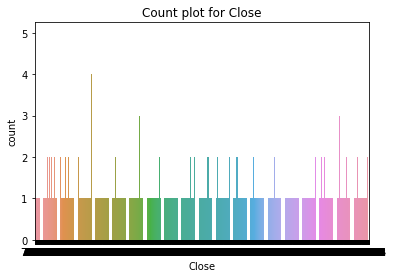

In [ ]:
sns.countplot(x ='Close', data = data).set_title('Count plot for Close')

In [ ]:
train_set = data[:'2016'].iloc[:,1:2].values
test_set = data['2017':].iloc[:,1:2].values

In [ ]:
train_set.shape

(2769, 1)

In [ ]:
test_set.shape

(251, 1)

In [ ]:
len(test_set)

251

In [ ]:
len(train_set)

2769

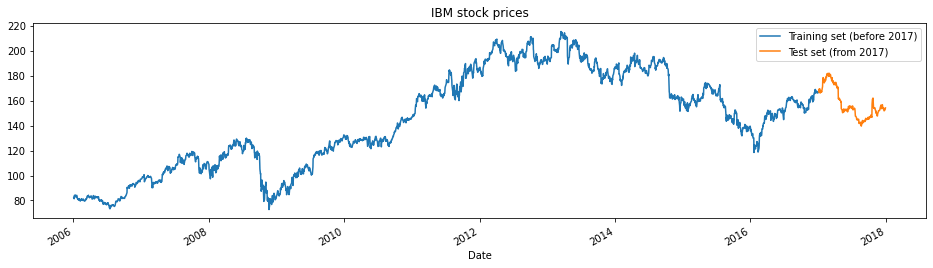

In [ ]:
data["Open"][:"2016"].plot(figsize=(16,4), legend=True)
data["Open"]["2017":].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (before 2017)", "Test set (from 2017)"])
plt.title("IBM stock prices")
plt.show()

In [ ]:
# Splitting the dataset

X_train = []
Y_train = []

for i in range(60,2769):
    X_train.append(train_scaled[i-60:i, 0])
    Y_train.append(train_scaled[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
X_train.shape

(2709, 60)

In [ ]:
Y_train.shape

(2709,)

In [ ]:
# Reshape

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# feature scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train_set)

In [ ]:
# Making LSTM model

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs = 15, batch_size = 1, verbose = 2)

Epoch 1/15
2709/2709 - 29s - loss: 0.0079
Epoch 2/15
2709/2709 - 26s - loss: 0.0045
Epoch 3/15
2709/2709 - 28s - loss: 0.0043
Epoch 4/15
2709/2709 - 26s - loss: 0.0042
Epoch 5/15
2709/2709 - 28s - loss: 0.0042
Epoch 6/15
2709/2709 - 26s - loss: 0.0042
Epoch 7/15
2709/2709 - 27s - loss: 0.0042
Epoch 8/15
2709/2709 - 26s - loss: 0.0041
Epoch 9/15
2709/2709 - 27s - loss: 0.0041
Epoch 10/15
2709/2709 - 26s - loss: 0.0041
Epoch 11/15
2709/2709 - 27s - loss: 0.0041
Epoch 12/15
2709/2709 - 26s - loss: 0.0041
Epoch 13/15
2709/2709 - 27s - loss: 0.0040
Epoch 14/15
2709/2709 - 27s - loss: 0.0041
Epoch 15/15
2709/2709 - 26s - loss: 0.0040


In [ ]:
data_compiled = pd.concat((data['Open'][:'2016'], data['Open']['2017':]), axis=0)
print(data_compiled.shape)

(3020,)


In [ ]:
inputs = data_compiled[len(data_compiled)-len(test_set)-60 : ].values
print(inputs.shape)

(311,)


In [ ]:
inputs = inputs.reshape(-1,1)
print(inputs.shape)

(311, 1)


In [ ]:
inputs = sc.transform(inputs)
print(inputs.shape)

(311, 1)


In [ ]:
# preparing test set for prediction

X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# predicting the stock prices for test set

predicted_val = model.predict(X_test)

In [ ]:
X_test.shape

(251, 60, 1)

In [ ]:
test_set.shape

(251, 1)

In [ ]:
predicted_val = np.squeeze(predicted_val, axis=-1)

In [ ]:
predicted_val.shape

(251, 60)

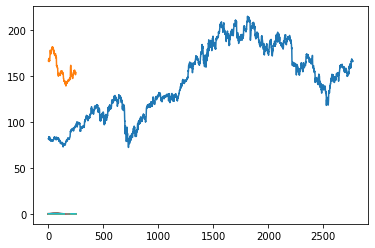

In [ ]:
# plotting the predictions

plt.plot(predicted_val, label = "Predicted price")
plt.plot(train_set, label = "trained set")
plt.plot(test_set, label = "Actual price")
plt.show()

In [ ]:
# predicted values as a dataframe

predicted_val = pd.DataFrame(data = predicted_val)

In [ ]:
predicted_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       250 non-null    float32
 1   1       249 non-null    float32
 2   2       248 non-null    float32
 3   3       247 non-null    float32
 4   4       246 non-null    float32
 5   5       245 non-null    float32
 6   6       244 non-null    float32
 7   7       243 non-null    float32
 8   8       242 non-null    float32
 9   9       241 non-null    float32
 10  10      240 non-null    float32
 11  11      239 non-null    float32
 12  12      238 non-null    float32
 13  13      237 non-null    float32
 14  14      236 non-null    float32
 15  15      235 non-null    float32
 16  16      234 non-null    float32
 17  17      233 non-null    float32
 18  18      232 non-null    float32
 19  19      231 non-null    float32
 20  20      230 non-null    float32
 21  21      229 non-null    float32
 22  22